# 단순선형회귀

독립변수($x$)의 변화에 따른 종속변수($y$)를 추론하는 통계.

하나의 독립변수와 하나의 종속변수가 주어진다.

가장 심플한 형태의 회귀분석

파이썬에서는 statemodels 패키지와 sklearn 패키지가 회귀분석 기능을 제공한다.

>sklearn은 머신러닝에 속하기 때문에 여기서는 statemodels만 살펴봄

## 01. 작업준비
#### 패키지 참조

In [1]:
from pandas import read_excel
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import pearson_r

#### 데이터 가져오기
자동차의 속도(speed)에 따른 제동거리(dist) 조사 데이터

In [2]:
df = read_excel("https://data.hossam.kr/E04/cars.xlsx")
df

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


## 02. 탐색적 데이터 분석
#### 산점도 그래프

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

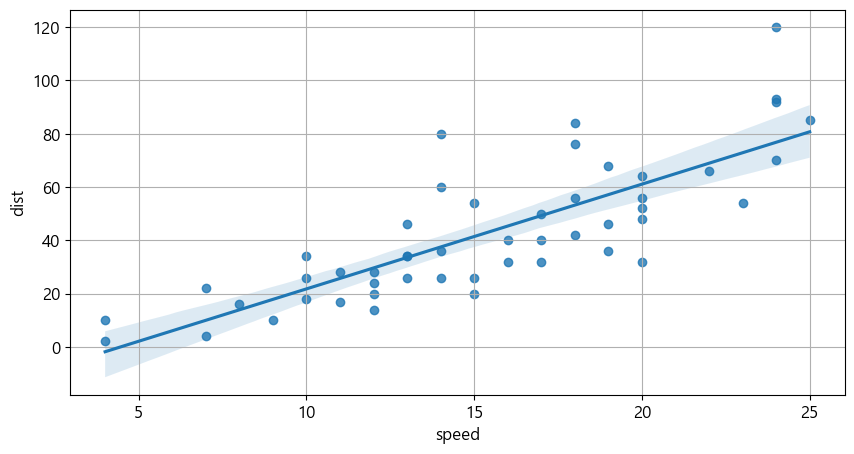

In [4]:
plt.rcParams['figure.figsize'] = (10, 5)
sb.regplot(data=df, x= 'speed', y ='dist')
plt.grid()
plt.show()
plt.close()

## 03. 추론통계
#### 1) 상관분석

In [5]:
pearson_r(df)

,statistic,pvalue,result
fields,,,
speed vs dist,0.806895,1.489836e-12,True
dist vs speed,0.806895,1.489836e-12,True


> 상관 분석 결과 t test의 p-value 값이 우리가 설정한 유의수준이 0.05보다 작으므로 제동거리와 속도간의 양의 상관관계가 통계적으로 유의함을 알 수 있다.

#### 2) 회귀분석
$y = ax + b$ 에 따라 `종속 ~ 독립` 형태로 표현식을 구성한다.

##### 분석을 위한 학습모델 구성


In [11]:
model = ols('dist~ speed',data =df)
model

#### 분석결과 확인

In [12]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.49e-12
Time:                        16:37:45   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 분석결과 해석

##### 모형적합도 해석

모형이 데이터에 잘 맞는 정도를 보여주는 지표

plain
R-squared:                       0.651
Adj. R-squared:                  0.644
F-statistic:                     89.57
Prob (F-statistic):           1.49e-12
Log-Likelihood:                -206.58
AIC:                             417.2
BIC:                             421.0

R-squared (R제곱, 결정계수)

모형의 설명력을 의미

dist 제동거리를 speed가 약 65% 설명한다. (각 사례마다 dist에 차이가 있다.)

Adj. R-squared

독립변수가 여러 개인 다중회귀분석에서 사용

독립변수의 개수와 표본의 크기를 고려하여 R-squared를 보정

서로 다른 모형을 비교할 때는 이 지표가 높은 쪽은 선택한다

$F-statistic: 89.57, Prob(F-statistic): 1.49e-12$

회귀모형에 대한 (통계적) 유의미성 검증 결과, 유의미함 (p < 0.05)

즉, 이 모형은 주어진 표본 뿐 아니라 모집단에서도 의미있는 모형이라 할 수 있음

**AIC, BIC**

로그 우도(log-likelihood): 종속변수가 정규분포라고 가정했을 때의 우도

로그우도를 독립변수의 수로 보정한 값 (작을 수록 좋다)

##### 회귀계수(coef) 해석


plain
                 coef (...생략...)   P>|t|

-------------------------------------------

Intercept    -17.5791 (...생략...)   0.012

speed          3.9324 (...생략...)   0.000

데이터로부터 얻은 계수의 추정치

절편(Intercept)의 추정치는 -17.5791로, speed가 0일 때 dist의 값

speed의 계수 추정치는 3.9324로 speed가 1 증가할 때마다 dist가 3.9324 증가한다는 것을 의미

이를 수식으로 정리

$dist = -17.5791 +3.9324 \times speed $ 

p값

모집단에서 계수가 0일 때, 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률

이 확률이 매우 작다는 것은, 모집단에서 speed의 계수가 정확히 3.9324는 아니더라도 현재의 표본과 비슷하게 0보다 큰 어떤 

범위에 있을 가능성이 높다는 것을 의미

보통 5%와 같은 유의수준을 정하여 p값이 그보다 작으면(p < 0.05), "통계적으로 유의미하다"라고 정리

speed가 증가할 때 기대되는 dist의 변화는 유의수준 5%에서 통계적으로 유의하다.

## 04. 결과 보고

#### 모형적합도 보고

F분포의 파라미터 2개와 그 때의 F값, p-value의 유의수준 비교를 명시

>dist에 대하여 speed로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다(F(1,48) = 89.57, p < 0.05)
##### 독립변수에 대해 보고
speed의 회귀계수는 3.9324로, dist에 대하여 유의미한 예측변인인 것으로 나타났다.(t(48) = 9.464, p < 0.05)